# Tutorial 3: Linear regression with polynomial features
[![View notebooks on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/amonroym99/uva-applied-ml/blob/main/docs/notebooks/3_lin_reg_poly.ipynb)

**Author:** Alejandro Monroy

In the last tutorial, we introduced the linear regression model, which is a powerful tool for modeling the relationship between a dependent variable and one or more independent variables. However, linear regression is limited to capturing linear relationships. In many real-world scenarios, the relationship between variables is non-linear.

In this tutorial, we will explore how to extend linear regression to capture non-linear relationships using polynomial features. By transforming the original features into polynomial features, we can fit a linear model to these transformed features, effectively capturing non-linear patterns in the data. We will also understand the concept of overfiting and how to mitigate it using regularization techniques such as Ridge regression.

## 1. Polynomial features to learn non-linear dependencies

We will start with two synthetic datasets with non-linar dependencies.

### 1.1. Generating and visualizing the data

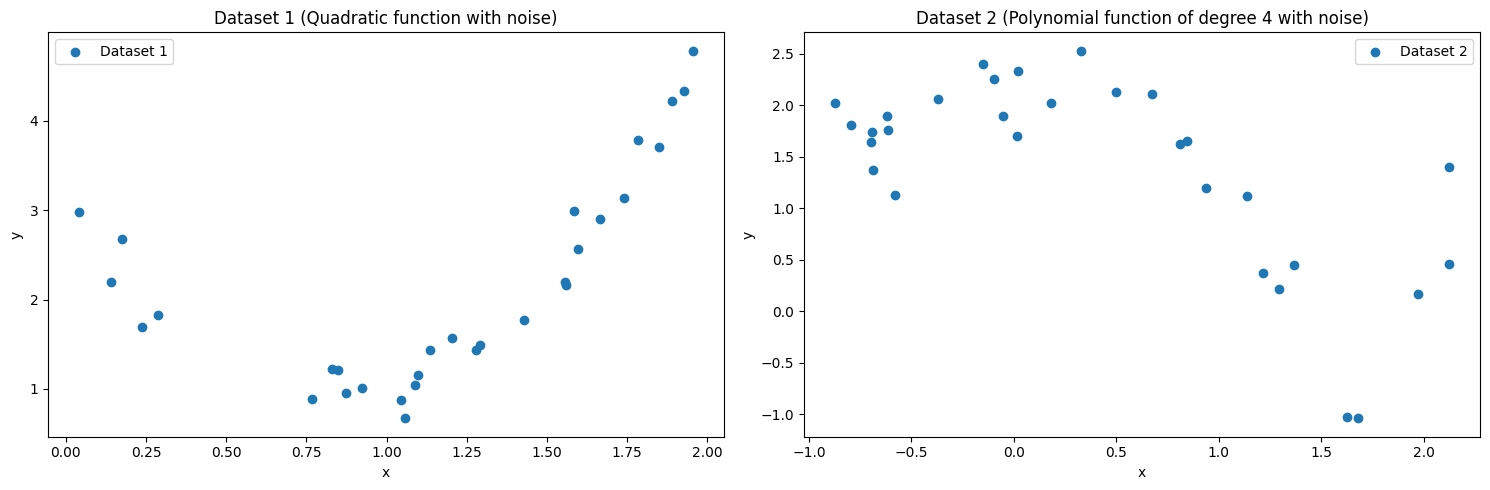

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic datasets
np.random.seed(0)
x1 = np.sort(np.random.rand(30) * 2)
y1 = 3 * x1 ** 2 -  5 * x1 + 3 + np.random.randn(30) * 0.2

x2 = np.sort(np.random.rand(30) * 3.2 - 1)
y2 = x2 ** 4 - 2 * x2 ** 3 - x2 ** 2 + x2 + 2 + np.random.randn(30) * 0.3

# Plot the generated datasets
plt.figure(figsize=(15, 5))

# Dataset 1
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Dataset 1')
plt.title('Dataset 1 (Quadratic function with noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Dataset 2
plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Dataset 2')
plt.title('Dataset 2 (Polynomial function of degree 4 with noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


### 1.2. Linear regression is not complex enough to learn these datasets

Let's see what is the result of fitting a linear regression model to the first dataset:

In [2]:
from sklearn.model_selection import train_test_split

# Split dataset 1 into training and test sets
x1 = x1.reshape(-1, 1)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.25, random_state=42)

❗️ _**Note:** Before doing the split, we reshape `x1`to turn it into a matrix with one column. This step is necessary, as the models that we will use expect the features to be a 2-dimensional vector, even if there is only one feature._

MSE: 1.066


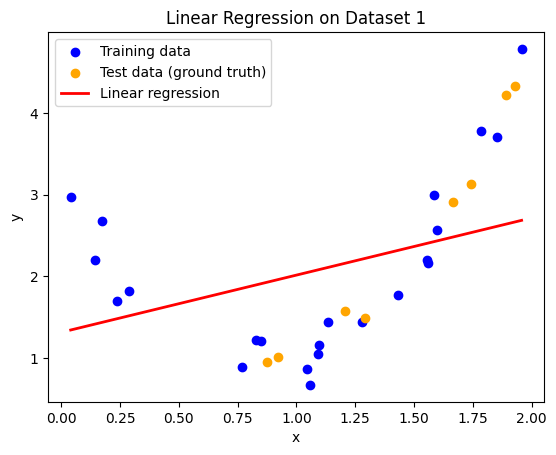

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(x_train_1, y_train_1)

# Predict y values for the training and test sets
y_pred = model.predict(x_test_1)

# Compute the mean squared error on the training and test sets
mse = mean_squared_error(y_test_1, y_pred)
print(f'MSE: {mse:.3f}')

# Plot the scatter plot and the predicted linear regression line
plt.scatter(x_train_1, y_train_1, color='blue', label='Training data')
plt.scatter(x_test_1, y_test_1, color='orange', label='Test data (ground truth)')
plt.plot(x1, model.predict(x1), color='red', linewidth=2, label='Linear regression')
plt.title('Linear Regression on Dataset 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We observe that our linear model is not really a good fit for this dataset. We clearly need a curved line to get a better fit.

### 1.3. Polynomial Features
We can model non-linear relationships by transforming the original features into polynomial terms. For example, given a feature $x$, we can create polynomial features up to degree 2 as $[1, x, x^2]$. This transformation enables linear models to fit non-linear data.

Mathematically, for a feature vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]$ and a polynomial degree $d$, the polynomial features include all combinations of $x_i$ up to the $d$-th degree. For instance, with $d = 2$, the polynomial features are:

$$
[1, x_1, x_2, \ldots, x_n, x_1^2, x_1 x_2, \ldots, x_n^2]
$$

This transformation allows a linear regression model to capture non-linear patterns in the data.

MSE: 0.017


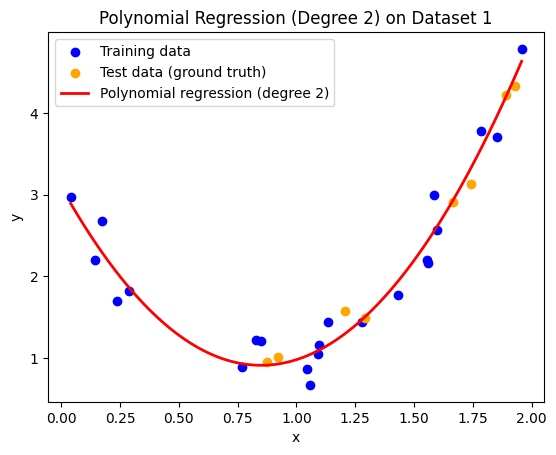

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the input features to polynomial features of degree 2
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train_1)
x_test_poly = poly_features.transform(x_test_1)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_poly, y_train_1)

# Predict y values for the training and test sets
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

# Compute the mean squared error on the training and test sets
train_mse = mean_squared_error(y_train_1, y_train_pred)
test_mse = mean_squared_error(y_test_1, y_test_pred)

# Compute the mean squared error on the training and test sets
mse = mean_squared_error(y_test_1, y_test_pred)
print(f'MSE: {mse:.3f}')

# Plot the scatter plot and the predicted polynomial curve
plt.scatter(x_train_1, y_train_1, color='blue', label='Training data')
plt.scatter(x_test_1, y_test_1, color='orange', label='Test data (ground truth)')
plt.plot(np.linspace(min(x1), max(x1), 100), model.predict(poly_features.transform(np.linspace(min(x1), max(x1), 100))), color='red', linewidth=2, label='Polynomial regression (degree 2)')
plt.title('Polynomial Regression (Degree 2) on Dataset 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

This looks like a much better fit to our dataset, considerably reducing the MSE from 1.066 to 0.017.

As we did in the previous tutorial, we can read the variables in the model object to get the learnt regression formula. In this case, since we have created new polynomial features, we need to check which features were generated. The `poly_features` object stores the names of these features in the `powers_` variable. By examining this variable, we can understand the transformation applied to the original features and interpret the learnt regression formula accordingly:


In [5]:
print("Power of polynomial features: ", poly_features.powers_)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Power of polynomial features:  [[0]
 [1]
 [2]]
Coefficients:  [ 0.         -5.14342437  3.02908444]
Intercept:  3.095198352031404


Therefore, our learnt model is

$$
\hat{y} = 3.03 x^2 - 5.14 x + 3.10,
$$

which is very similar to the function that we used to generate the data in section 1.1. 😄

## 2. A more complex dataset: How to deal with overfitting

### 2.1. Polynomial features on the second dataset

Now, let's apply linear regression with polynomial features to the second dataset. 

In [6]:
# Split dataset 2 into training and test sets
x2 = x2.reshape(-1, 1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size=0.25, random_state=42)

As we might not know which degree we should use, let's apply it for some different degrees:

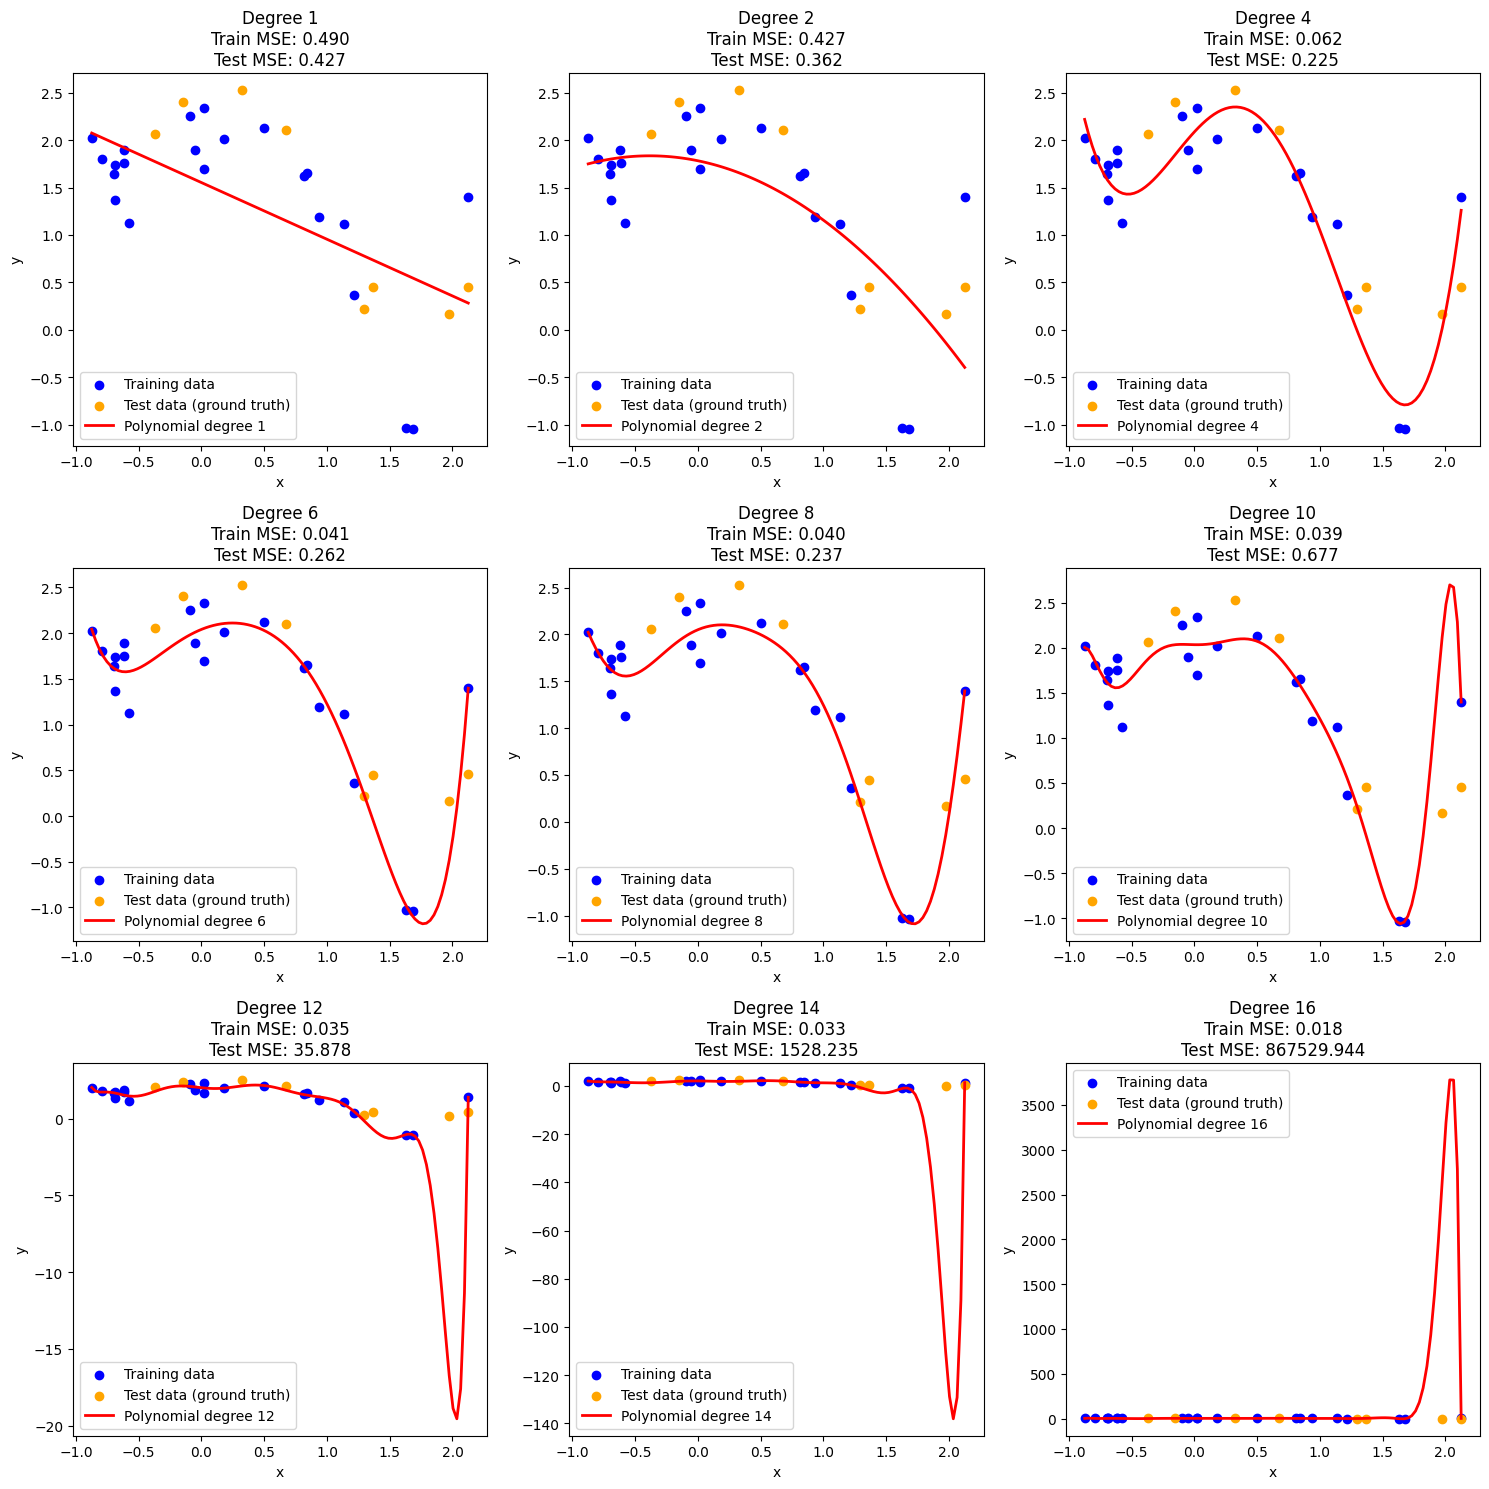

In [7]:
plt.figure(figsize=(15, 15))
for i, degree in enumerate([1, 2, 4, 6, 8, 10, 12, 14, 16]):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train_2)
    x_test_poly = poly.transform(x_test_2)
    x_range_poly = poly.transform(np.linspace(min(x2), max(x2), 100))
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train_2)
    
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    y_range_pred = model.predict(x_range_poly)
    
    train_mse = mean_squared_error(y_train_2, y_train_pred)
    test_mse = mean_squared_error(y_test_2, y_test_pred)
    
    plt.subplot(3, 3, i + 1)
    plt.scatter(x_train_2, y_train_2, color='blue', label='Training data')
    plt.scatter(x_test_2, y_test_2, color='orange', label='Test data (ground truth)')
    plt.plot(np.linspace(min(x2), max(x2), 100), y_range_pred, color='red', linewidth=2, label=f'Polynomial degree {degree}')
    plt.title(f'Degree {degree}\nTrain MSE: {train_mse:.3f}\nTest MSE: {test_mse:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

Let's analyze the results above. As the degree of the polynomial increases, the model becomes more complex and starts to fit the training data more closely. This can be observed in the plots where higher-degree polynomials (e.g., degree 16) show a very wiggly curve that makes drastic swings to pass through as most training points as possible. While this might seem like a good fit, it often captures the noise in the training data rather than the true underlying pattern. 

This is reflected in the train and test mean squared errors. The MSE on the training set decreases as the polynomial degree increases, indicating a better fit to the training data. However, the MSE on the test set increases, indicating poor generalization to new data. This phenomenon is called **overfitting**.

To mitigate overfitting, one can use techniques such as:
- **Using a simpler model**: This reduces the capacity of the model of overfitting to the training data. In the case of polynomial regression, we can choose a lower-degree polynomial that generalizes better to new data (e.g. degree 4).
- **Cross-Validation**: Helps in selecting the optimal model parameters by evaluating model performance on different subsets of the data. We will cover cross-validation in more detail in Tutorial 5.
- **Regularization**: Techniques like Ridge or Lasso add a penalty to the model complexity to prevent overfitting.

### 2.2. Ridge regression
Ridge regression is a technique used to prevent overfitting in linear regression models by adding a penalty to the size of the coefficients. This penalty helps to keep the coefficients small, which can improve the model's ability to generalize to new data.

In ridge regression, we modify the loss function by adding a term that penalizes large coefficients. The modified loss function is:

$$
\text{Loss} = \text{MSE} + \alpha \sum_{i=1}^{n} \beta_i^2
$$

where:
- $\text{MSE}$ is the mean squared error of the model.
- $\alpha$ is a hyperparameter that controls the strength of the penalty.
- $\beta_i$ are the coefficients of the model.

The $\alpha$ parameter determines how much we penalize large coefficients. A larger $\alpha$ means more regularization (stronger penalty), while a smaller $\alpha$ means less regularization.

Ridge regression is especially useful when:
- We have a large number of features.
- The features are highly correlated.

By shrinking the coefficients, ridge regression helps to reduce the variance of the model and improve its performance on new data.

Let's apply ridge regression to our dataset:

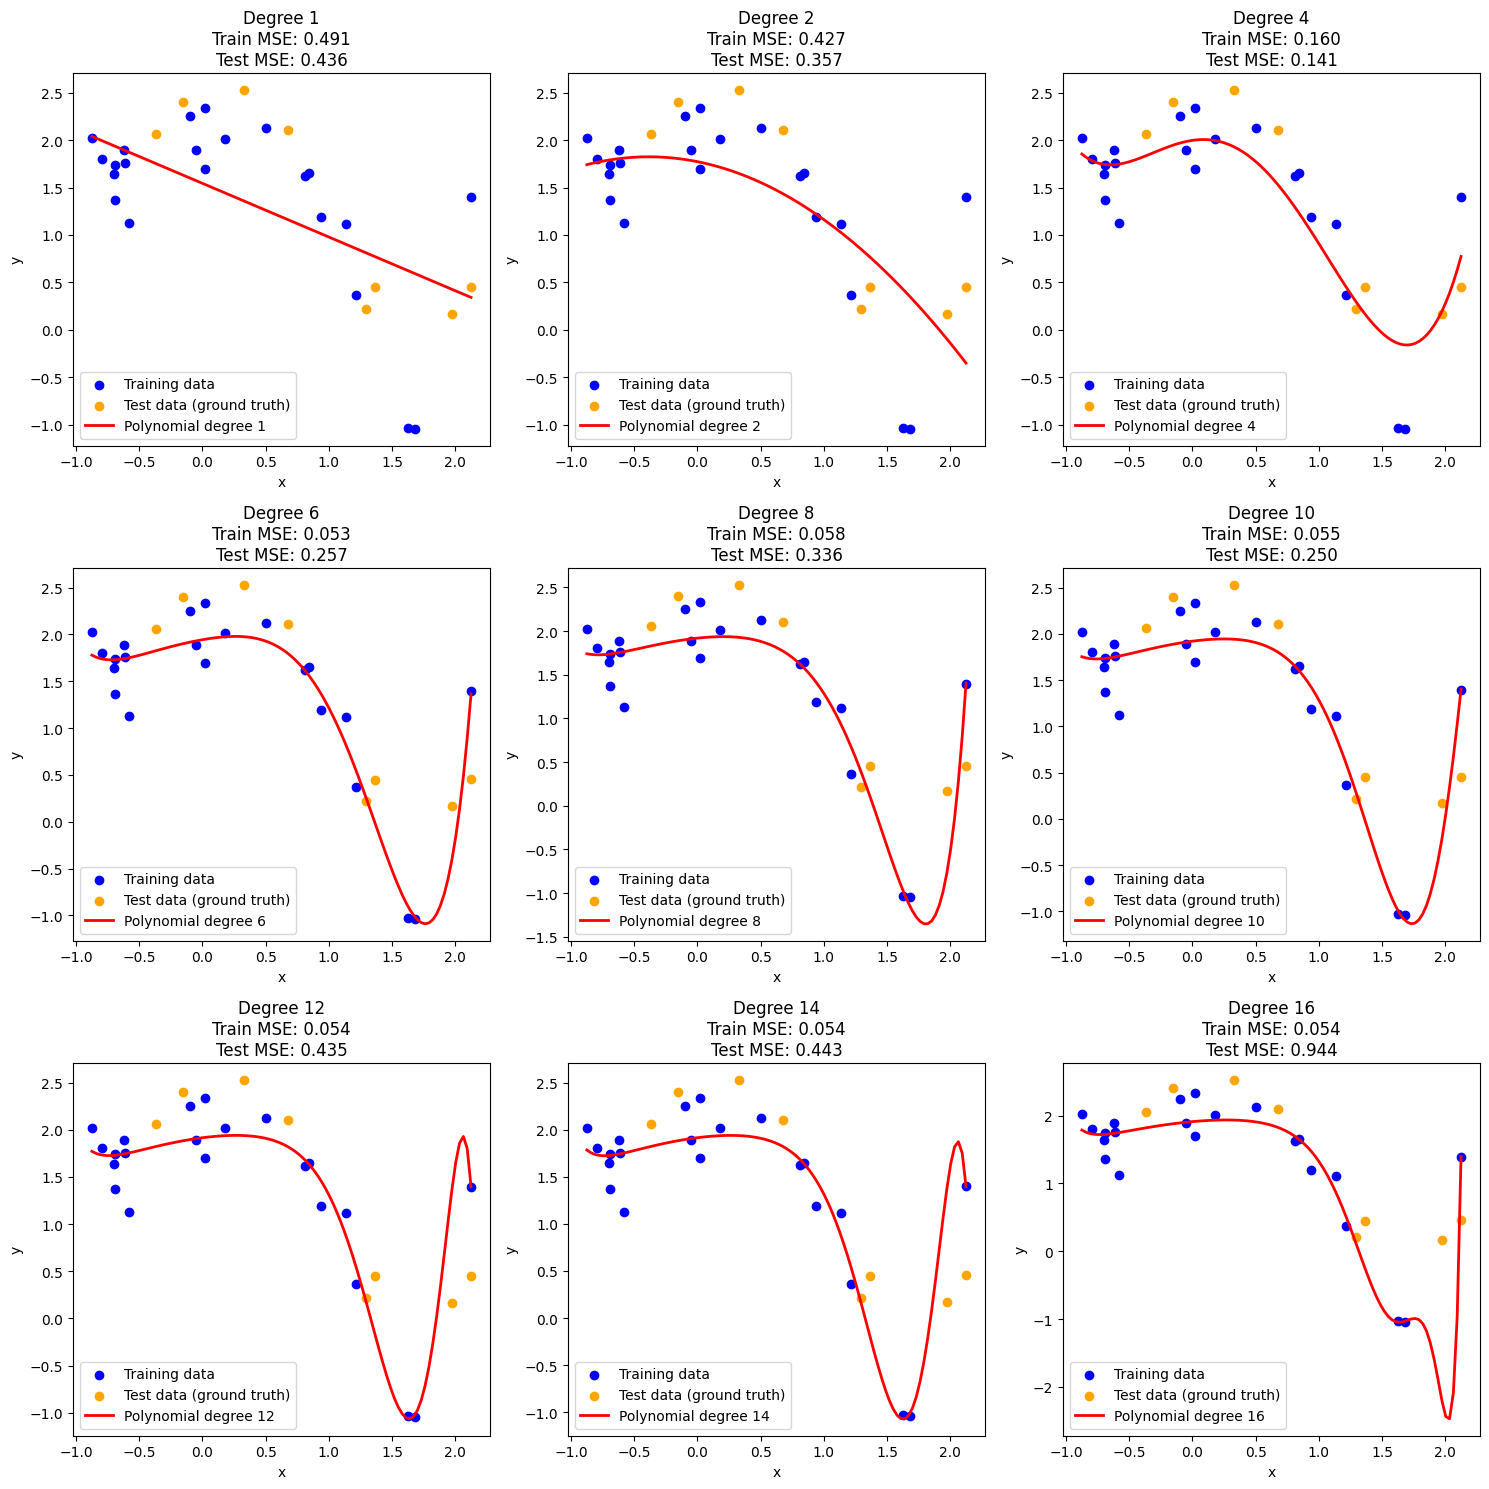

In [8]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(15, 15))
for i, degree in enumerate([1, 2, 4, 6, 8, 10, 12, 14, 16]):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train_2)
    x_test_poly = poly.transform(x_test_2)
    x_range_poly = poly.transform(np.linspace(min(x2), max(x2), 100))
    
    model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
    model.fit(x_train_poly, y_train_2)
    
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    y_range_pred = model.predict(x_range_poly)
    
    train_mse = mean_squared_error(y_train_2, y_train_pred)
    test_mse = mean_squared_error(y_test_2, y_test_pred)
    
    plt.subplot(3, 3, i + 1)
    plt.scatter(x_train_2, y_train_2, color='blue', label='Training data')
    plt.scatter(x_test_2, y_test_2, color='orange', label='Test data (ground truth)')
    plt.plot(np.linspace(min(x2), max(x2), 100), y_range_pred, color='red', linewidth=2, label=f'Polynomial degree {degree}')
    plt.title(f'Degree {degree}\nTrain MSE: {train_mse:.3f}\nTest MSE: {test_mse:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

Even if we still identify the same pattern as before (test MSE increases after degree >4), the overfitting is much less pronounced, especially for the higher degrees. This indicates that Ridge regression is effectively reducing the model complexity by penalizing large coefficients, which helps in preventing the model from fitting the noise in the training data.

By adding the regularization term, Ridge regression ensures that the model coefficients remain small, leading to a smoother and more generalizable model. This is particularly important for higher-degree polynomial models, which tend to have large coefficients and can easily overfit the training data.

📝 _**Task for you:** Get the regression formula as we did with the first dataset and compare it with the one we used to generate the data._